In [161]:
import pandas as pd
import seaborn as sns
import seaborn as sn
import altair as alt
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [162]:
df = pd.read_csv('agriculture_dataset.csv')

In [163]:
df

,Farm_ID,Crop_Type,IoT_Sensors,Automation_Level,Yield_kg,Country,Year
0,F0,Onions,14,Medium,3000,Spain,2016
1,F1,Wheat,15,High,4000,USA,2013
2,F2,Corn,20,Medium,6000,Brazil,2014
3,F3,Soybeans,18,Low,3500,India,2015
4,F4,Rice,25,High,5000,China,2016
...,...,...,...,...,...,...,...
96,F96,Peppers,10,Low,3000,USA,2018
97,F97,Apples,22,Medium,5500,Germany,2019
98,F98,Grapes,15,High,8000,Italy,2020
99,F99,Oranges,28,Low,4000,France,2021


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Farm_ID           101 non-null    object
 1   Crop_Type         101 non-null    object
 2   IoT_Sensors       101 non-null    int64 
 3   Automation_Level  101 non-null    object
 4   Yield_kg          101 non-null    int64 
 5   Country           101 non-null    object
 6   Year              101 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 5.7+ KB


In [165]:
df.describe()

,IoT_Sensors,Yield_kg,Year
count,101.000000,101.000000,101.000000
mean,20.069307,5064.356436,2017.485149
std,6.474963,1567.902048,2.876157
min,10.000000,2500.000000,2013.000000
25%,15.000000,4000.000000,2015.000000
50%,20.000000,5000.000000,2017.000000
75%,25.000000,6000.000000,2020.000000
max,30.000000,8000.000000,2022.000000


In [166]:
df.dtypes

Farm_ID             object
Crop_Type           object
IoT_Sensors          int64
Automation_Level    object
Yield_kg             int64
Country             object
Year                 int64
dtype: object

In [167]:
df.isnull().sum()

Farm_ID             0
Crop_Type           0
IoT_Sensors         0
Automation_Level    0
Yield_kg            0
Country             0
Year                0
dtype: int64

In [168]:
print(df.columns)

Index(['Farm_ID', 'Crop_Type', 'IoT_Sensors', 'Automation_Level', 'Yield_kg',
       'Country', 'Year'],
      dtype='object')


In [169]:
df.head()

,Farm_ID,Crop_Type,IoT_Sensors,Automation_Level,Yield_kg,Country,Year
0,F0,Onions,14,Medium,3000,Spain,2016
1,F1,Wheat,15,High,4000,USA,2013
2,F2,Corn,20,Medium,6000,Brazil,2014
3,F3,Soybeans,18,Low,3500,India,2015
4,F4,Rice,25,High,5000,China,2016


<Axes: >

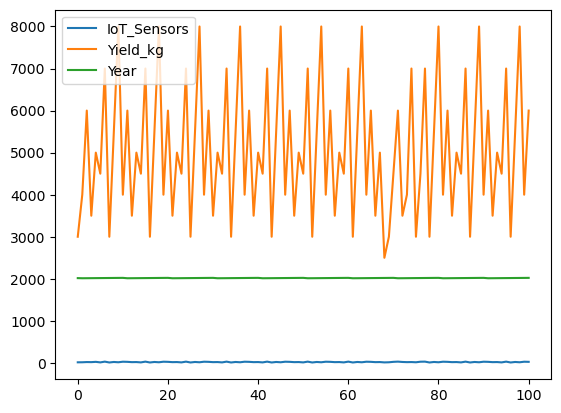

In [170]:
df.plot()

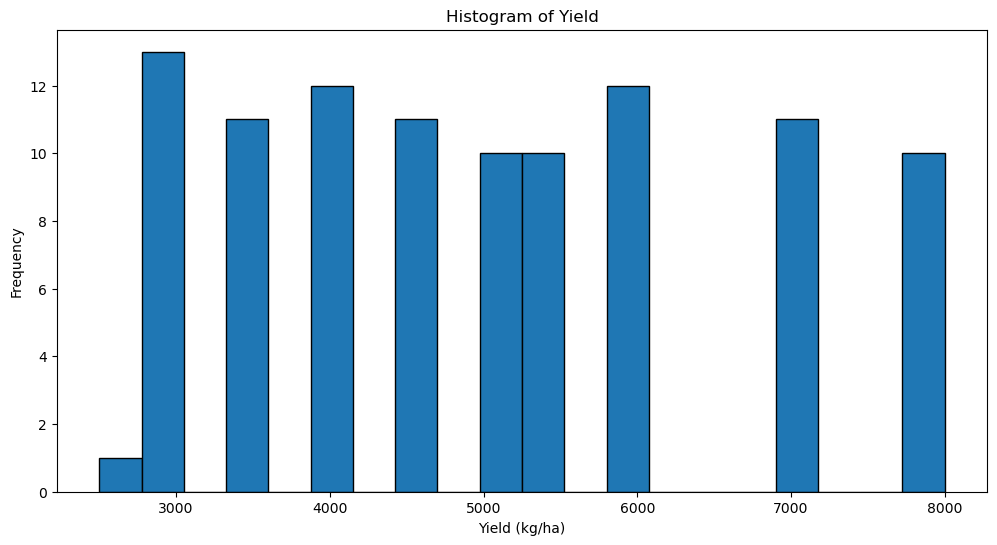

In [171]:
# Histogram of Yield
plt.figure(figsize=(12, 6))
plt.hist(df['Yield_kg'], bins=20, edgecolor='black')
plt.title('Histogram of Yield')
plt.xlabel('Yield (kg/ha)')
plt.ylabel('Frequency')
plt.show()

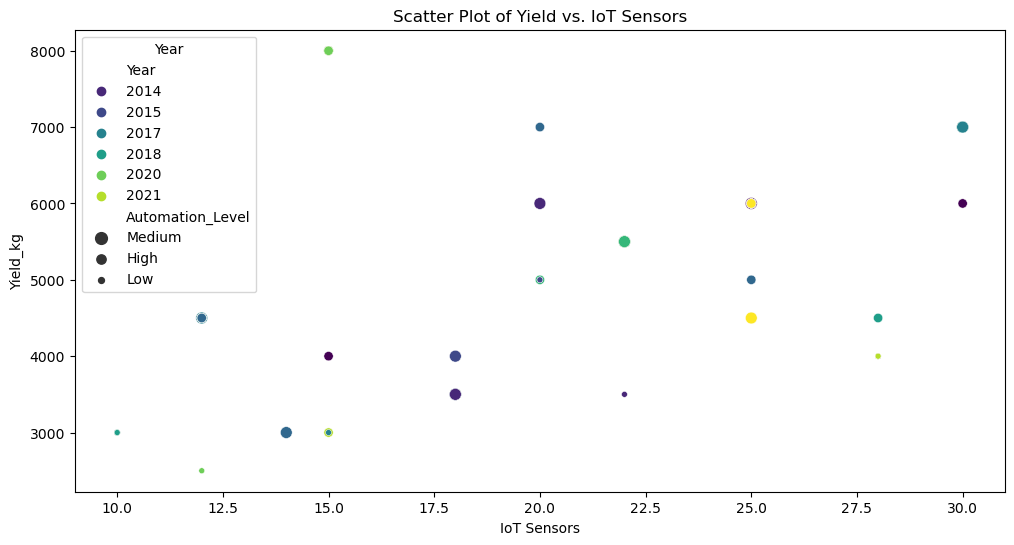

In [172]:
# Scatter plot of Yield vs. IoT Sensors
plt.figure(figsize=(12, 6))
sns.scatterplot(x='IoT_Sensors', y='Yield_kg', data=df, hue='Year', palette='viridis', size='Automation_Level')
plt.title('Scatter Plot of Yield vs. IoT Sensors')
plt.xlabel('IoT Sensors')
plt.ylabel('Yield_kg')
plt.legend(title='Year')
plt.show()

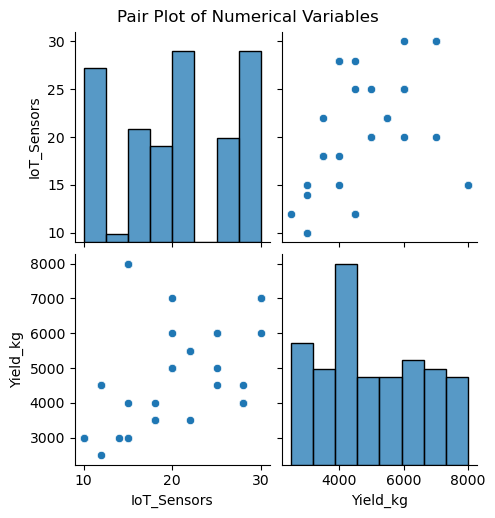

In [173]:
# Pair plot for numerical variables
sns.pairplot(df[['IoT_Sensors', 'Yield_kg']])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

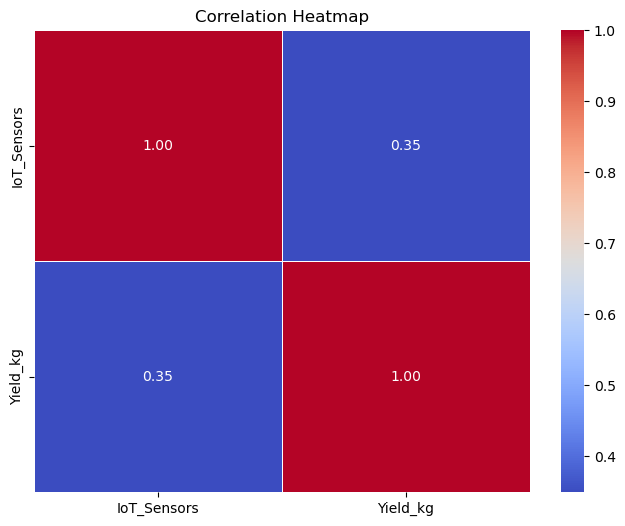

In [174]:
# Correlation heatmap
correlation_matrix = df[['IoT_Sensors', 'Yield_kg']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_14756\3506847944.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Crop_Type', y='Yield_kg', data=df, palette='muted', ci=None)


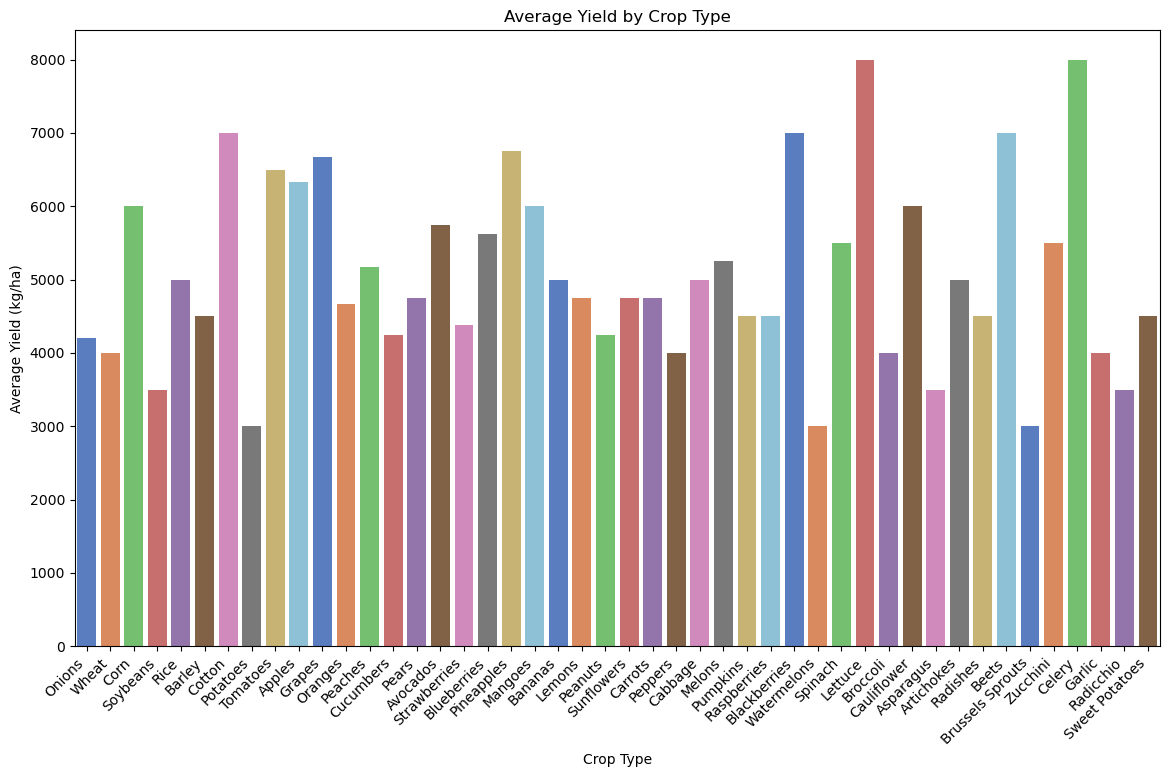

In [175]:
# Bar plot of average Yield by Crop Type
plt.figure(figsize=(14, 8))
sns.barplot(x='Crop_Type', y='Yield_kg', data=df, palette='muted', ci=None)
plt.title('Average Yield by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Average Yield (kg/ha)')
plt.xticks(rotation=45, ha='right')
plt.show()

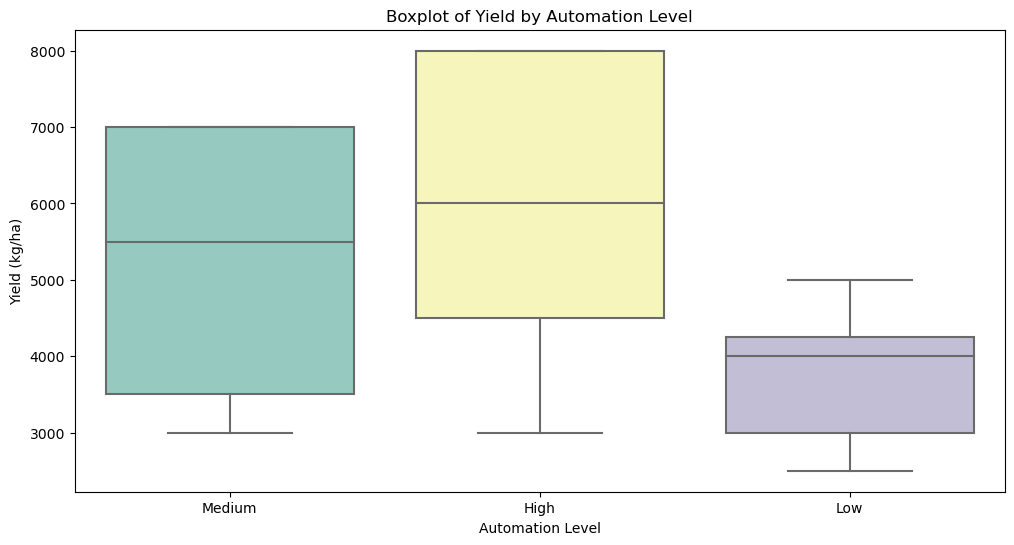

In [176]:
# Boxplot of Yield by Automation Level
plt.figure(figsize=(12, 6))
sns.boxplot(x='Automation_Level', y='Yield_kg', data=df, palette='Set3')
plt.title('Boxplot of Yield by Automation Level')
plt.xlabel('Automation Level')
plt.ylabel('Yield (kg/ha)')
plt.show()

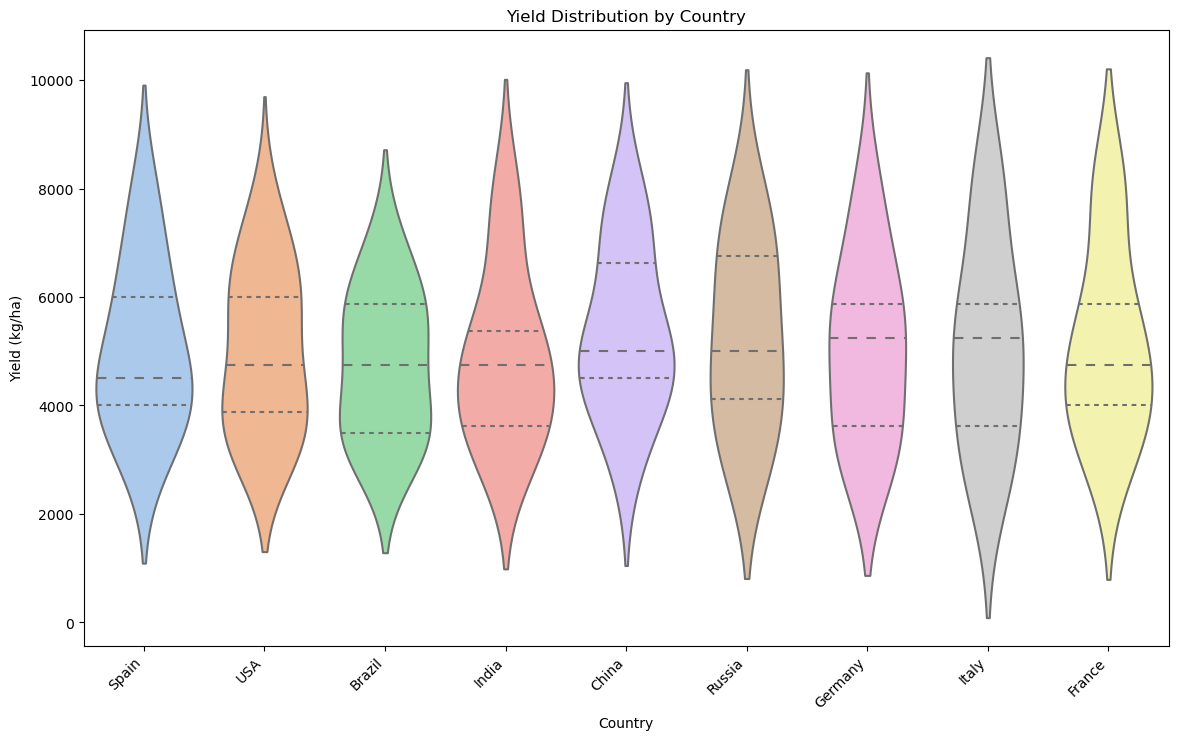

In [177]:
# Violin plot of Yield distribution by Country
plt.figure(figsize=(14, 8))
sns.violinplot(x='Country', y='Yield_kg', data=df, palette='pastel', inner='quartile')
plt.title('Yield Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Yield (kg/ha)')
plt.xticks(rotation=45, ha='right')
plt.show()

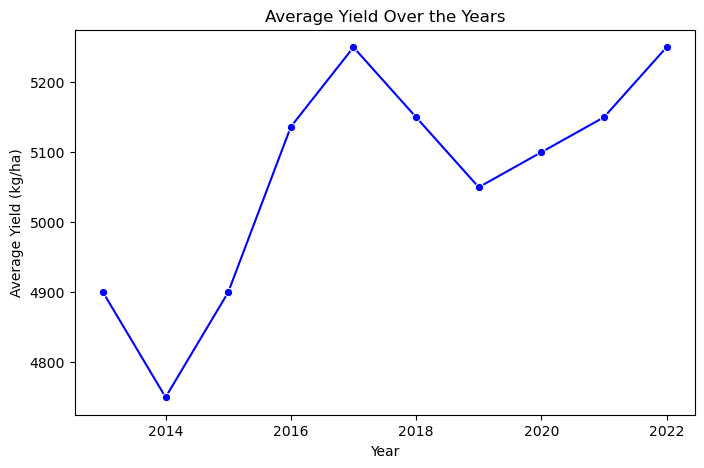

In [178]:
# Line plot of average Yield over the years
plt.figure(figsize=(8, 5))
average_yield_by_year = df.groupby('Year')['Yield_kg'].mean().reset_index()
sns.lineplot(x='Year', y='Yield_kg', data=average_yield_by_year, marker='o', color='b')
plt.title('Average Yield Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Yield (kg/ha)')
plt.show()

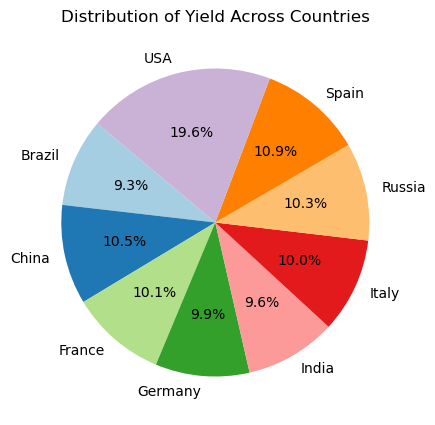

In [179]:
# Calculate total yield for each country
total_yield_by_country = df.groupby('Country')['Yield_kg'].sum().reset_index()

# Plotting a pie chart
plt.figure(figsize=(5, 5))
plt.pie(total_yield_by_country['Yield_kg'], labels=total_yield_by_country['Country'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Yield Across Countries')
plt.show()

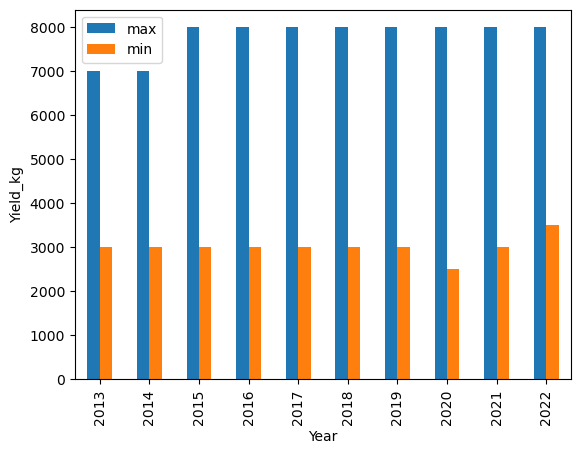

In [180]:
df.groupby('Year')['Yield_kg'].agg([max, min]).plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Yield_kg')
plt.show()

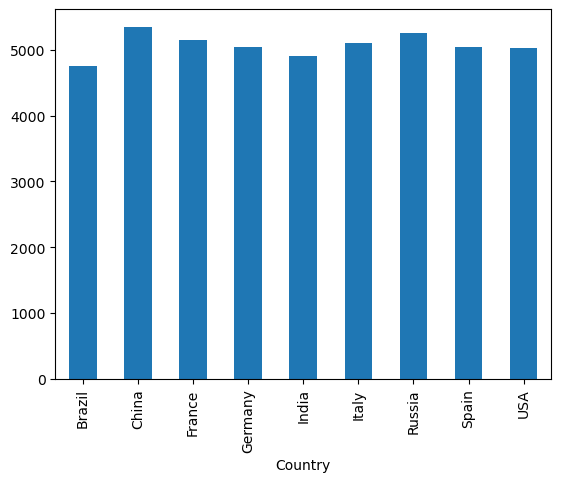

In [181]:
df.groupby("Country")["Yield_kg"].mean(numeric_only=True).plot(kind = "bar")
plt.show()

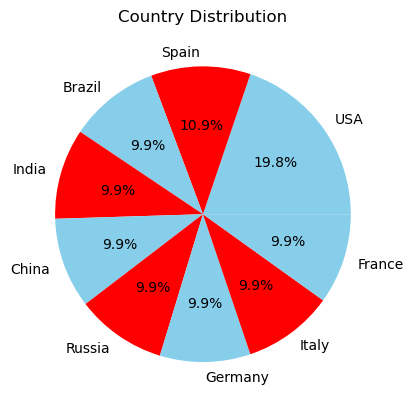

In [182]:
# Plotting the pie chart
df['Country'].value_counts().plot(kind='pie', autopct="%1.1f%%",  colors=['skyblue', 'red'])
plt.title('Country Distribution')
plt.ylabel('')  
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_14756\2426924834.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(),annot= True)


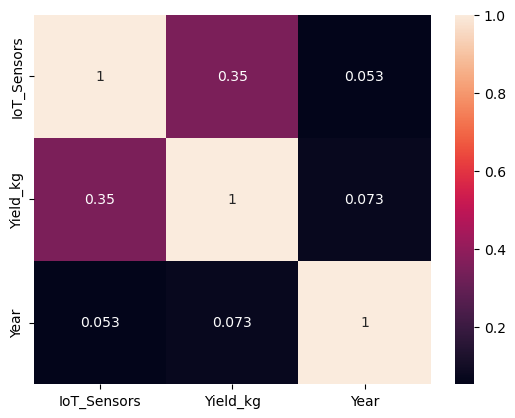

In [183]:
# Visualize the correlation between the variables
sn.heatmap(df.corr(),annot= True)
plt.show()

In [184]:
automation_yield_stats = df.groupby('Automation_Level')['Yield_kg'].describe()
print(automation_yield_stats)

                  count         mean          std     min     25%     50%  \
Automation_Level                                                            
High               36.0  5972.222222  1544.318826  3000.0  4500.0  6000.0   
Low                32.0  3828.125000   819.218501  2500.0  3000.0  4000.0   
Medium             33.0  5272.727273  1386.829281  3000.0  3500.0  5500.0   

                     75%     max  
Automation_Level                  
High              8000.0  8000.0  
Low               4250.0  5000.0  
Medium            7000.0  7000.0  


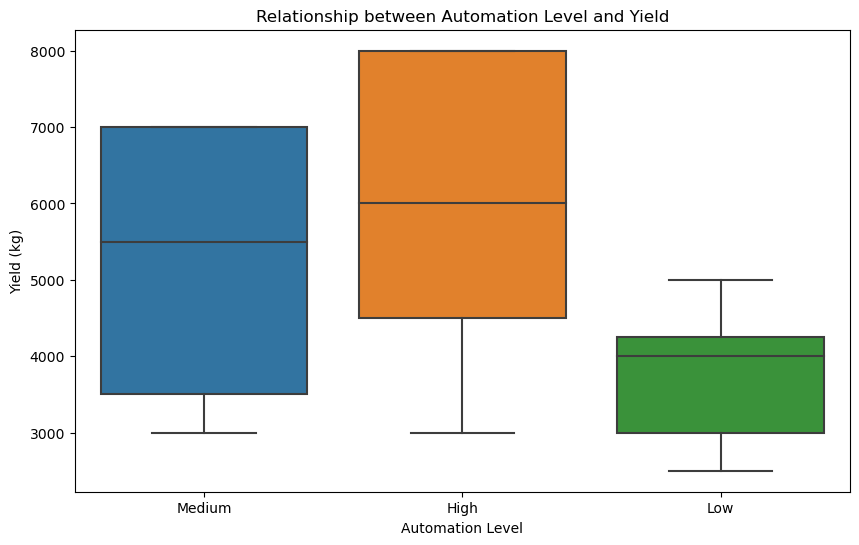

In [185]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Automation_Level', y='Yield_kg', data=df)
plt.xlabel('Automation Level')
plt.ylabel('Yield (kg)')
plt.title('Relationship between Automation Level and Yield')
plt.show()

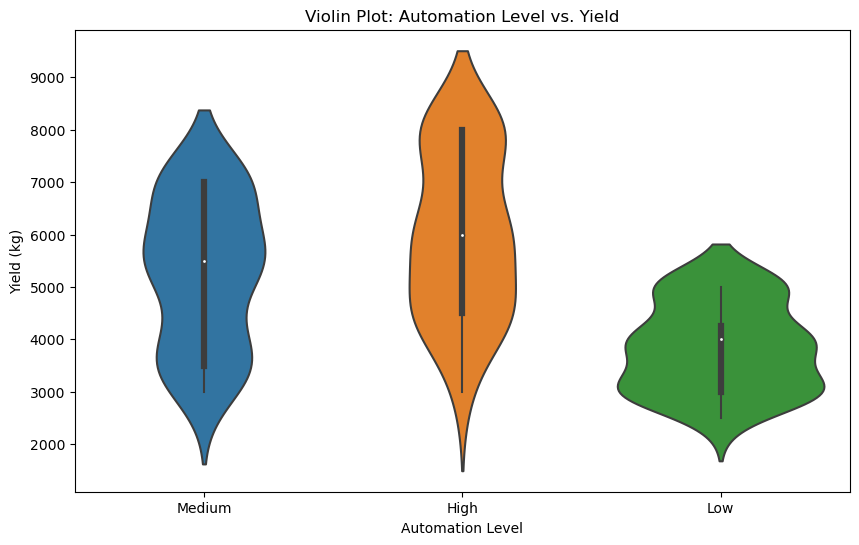

In [186]:
#Violin Plot:

plt.figure(figsize=(10, 6))
sns.violinplot(x='Automation_Level', y='Yield_kg', data=df)
plt.xlabel('Automation Level')
plt.ylabel('Yield (kg)')
plt.title('Violin Plot: Automation Level vs. Yield')
plt.show()

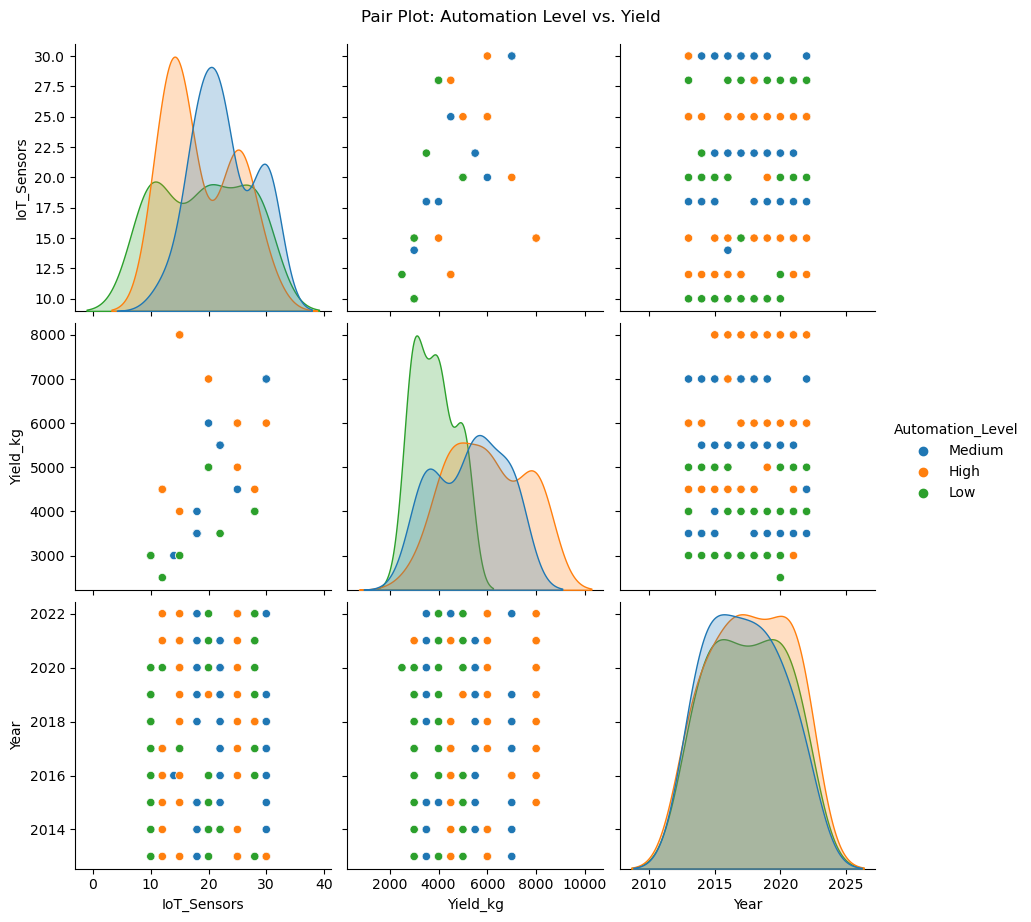

In [187]:
#Pair Plot:
sns.pairplot(df, hue='Automation_Level', height=3)
plt.suptitle('Pair Plot: Automation Level vs. Yield', y=1.02)
plt.show()

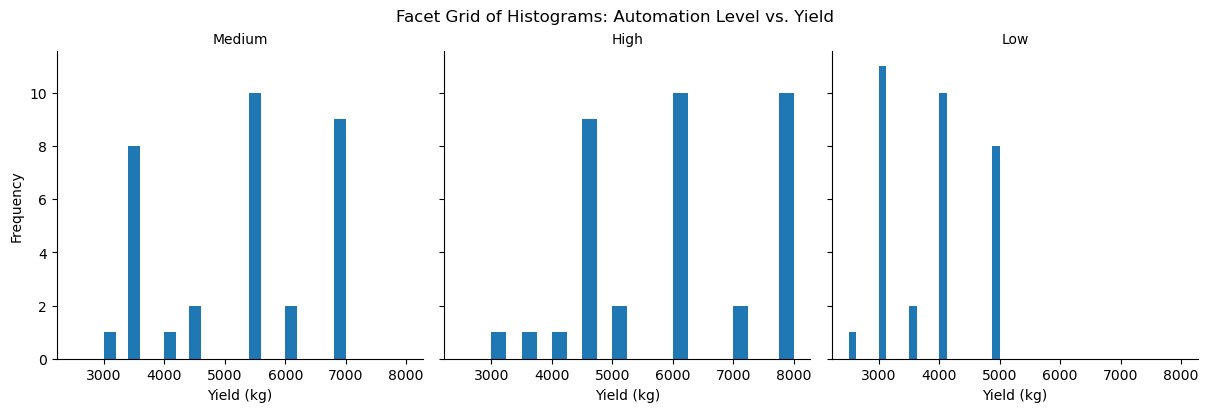

In [188]:
#Facet Grid of Histograms:
g = sns.FacetGrid(df, col='Automation_Level', height=4)
g.map(plt.hist, 'Yield_kg', bins=20)
g.set_axis_labels('Yield (kg)', 'Frequency')
g.set_titles(col_template='{col_name}')
plt.suptitle('Facet Grid of Histograms: Automation Level vs. Yield', y=1.02)
plt.show()

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [190]:
df['Automation_Level'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [191]:
from sklearn import preprocessing as preprocessing


In [192]:
le=preprocessing.LabelEncoder()

In [193]:
df.Automation_Level=le.fit_transform(df.Automation_Level)

In [194]:
df.Country=le.fit_transform(df.Country)

In [195]:
df.dtypes

Farm_ID             object
Crop_Type           object
IoT_Sensors          int64
Automation_Level     int32
Yield_kg             int64
Country              int32
Year                 int64
dtype: object

In [196]:
df.columns

Index(['Farm_ID', 'Crop_Type', 'IoT_Sensors', 'Automation_Level', 'Yield_kg',
       'Country', 'Year'],
      dtype='object')

In [197]:
new_order = ['Farm_ID', 'Crop_Type','IoT_Sensors', 'Yield_kg', 'Year','Country','Automation_Level']
df = df[new_order]

df

,Farm_ID,Crop_Type,IoT_Sensors,Yield_kg,Year,Country,Automation_Level
0,F0,Onions,14,3000,2016,7,2
1,F1,Wheat,15,4000,2013,8,0
2,F2,Corn,20,6000,2014,0,2
3,F3,Soybeans,18,3500,2015,4,1
4,F4,Rice,25,5000,2016,1,0
...,...,...,...,...,...,...,...
96,F96,Peppers,10,3000,2018,8,1
97,F97,Apples,22,5500,2019,3,2
98,F98,Grapes,15,8000,2020,5,0
99,F99,Oranges,28,4000,2021,2,1


In [198]:
df['Automation_Level'].unique()

array([2, 0, 1])

In [199]:
df

,Farm_ID,Crop_Type,IoT_Sensors,Yield_kg,Year,Country,Automation_Level
0,F0,Onions,14,3000,2016,7,2
1,F1,Wheat,15,4000,2013,8,0
2,F2,Corn,20,6000,2014,0,2
3,F3,Soybeans,18,3500,2015,4,1
4,F4,Rice,25,5000,2016,1,0
...,...,...,...,...,...,...,...
96,F96,Peppers,10,3000,2018,8,1
97,F97,Apples,22,5500,2019,3,2
98,F98,Grapes,15,8000,2020,5,0
99,F99,Oranges,28,4000,2021,2,1


In [200]:
X = df.iloc[:,2:-1]
X

,IoT_Sensors,Yield_kg,Year,Country
0,14,3000,2016,7
1,15,4000,2013,8
2,20,6000,2014,0
3,18,3500,2015,4
4,25,5000,2016,1
...,...,...,...,...
96,10,3000,2018,8
97,22,5500,2019,3
98,15,8000,2020,5
99,28,4000,2021,2


In [201]:
y = df.iloc[:,-1]
y

0      2
1      0
2      2
3      1
4      0
      ..
96     1
97     2
98     0
99     1
100    0
Name: Automation_Level, Length: 101, dtype: int32

In [202]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


In [203]:
# Create and train the linear regression model
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [204]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([2, 1, 2, 1, 1, 2, 2, 2, 0, 2, 1, 0, 2, 2, 2, 1, 0, 2, 2, 0, 1])

In [205]:
# Evaluate the model
accuracy_score(y_test,y_pred)

0.7142857142857143

In [206]:
confusion_matrix(y_test,y_pred)

array([[3, 0, 4],
       [0, 6, 1],
       [1, 0, 6]], dtype=int64)

In [207]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [208]:
# Create and fit a random forest model
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [209]:
# Make predictions on the test set
y_pred = model2.predict(X_test)
y_pred

array([0, 1, 2, 1, 1, 2, 2, 1, 0, 0, 1, 0, 2, 2, 1, 1, 0, 0, 2, 0, 1])

In [210]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion_mat}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9047619047619048
Confusion Matrix:
[[6 1 0]
 [0 7 0]
 [1 0 6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.88      1.00      0.93         7
           2       1.00      0.86      0.92         7

    accuracy                           0.90        21
   macro avg       0.91      0.90      0.90        21
weighted avg       0.91      0.90      0.90        21



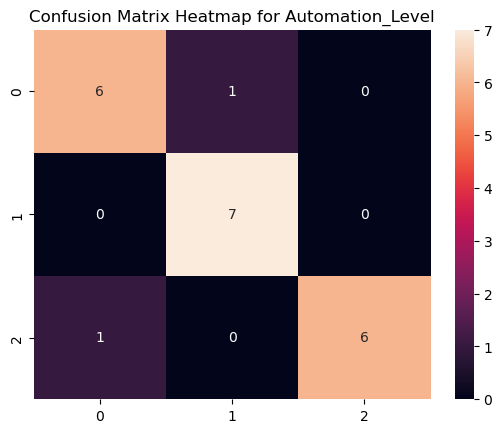

In [211]:
# Display the confusion matrix as a heatmap
sns.heatmap(confusion_mat, annot=True, fmt='d')
plt.title('Confusion Matrix Heatmap for Automation_Level')
plt.show()

In [212]:
df['Automation_Level'].unique()

array([2, 0, 1])

In [213]:
#array(['Medium', 'High', 'Low'], dtype=object)

In [214]:
pd.DataFrame({'Actual Result':y_test,'Predicted Result':y_pred})

,Actual Result,Predicted Result
20,0,0
10,1,1
97,2,2
16,1,1
64,1,1
24,2,2
53,2,2
67,0,1
41,0,0
47,0,0
